# Read the data from the Google Drive


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pwd
!cd /content/gdrive/My Drive/Sapio Analytics

/content
/bin/bash: line 0: cd: too many arguments


In [ ]:
os.chdir('/content/gdrive/My Drive/Sapio Analytics')
!pwd

/content/gdrive/My Drive/Sapio Analytics


In [ ]:
!pip install pandas-profiling==2.8.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline


#nlp
import string
import re  
import nltk
nltk.download('popular')  
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
#from KaggleWord2VecUtility import KaggleWord2VecUtility
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

lem = WordNetLemmatizer()
ps = PorterStemmer()
tokenizer=TweetTokenizer()
eng_stopwords = set(stopwords.words("english"))

#FeatureEngineering
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier,AdaBoostRegressor
from sklearn.svm import LinearSVR,SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier


#keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data

#eval
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

#svm

from sklearn.svm import  SVC


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Using TensorFlow backend.


# READING THE DATA USING PANDAS DATAFRAME



In [ ]:
data=pd.read_excel('Bengaluru.xlsx')
data.head()


,CHECK,Unnamed: 1,DEMOGRAPHIC,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,SOCIAL,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,% GDP Contribution,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,Check Demographic,Check Social,City,Zone,Ward,Area,Area_Source,Population,Population_Source,Density per square kilometer,Density per square kilometer_Source,Senior citizen %,Senior citizen %_Source,No of cases,No of cases_Source,Educational institutes,Educational institutes_Source,Hospitals,Hospitals_Source,Supermarts/malls,Supermarts/malls_Source,Type,Type_Source,Number of Households,Number of Households_Source,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside ...,No. of household with water connection inside ...,Total number of water connections,Total number of water connections_Source,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Density of retail store_Source,Per capita income,Per capita income_Source,Labour settlements in the region,Labour settlements in the region_Source,Migrant Population %,Migrant Population %_Source,Gender Ratio,Gender Ratio_Source,Domestic Violence %,Domestic Violence %_Source,Internet Penetration %,Internet Penetration %_Source,Police to Population Ratio per 1000,Police to Population Ratio per 1000_Source,Number of Kirana Shops,Number of Kirana Shops_Source,Number of Pharmacies,Number of Pharmacies_Source,Number of Liquor Stores,Number of Liquor Stores_Source,Estimates of Alcoholism % in Population,Estimates of Alcoholism % in Population_Source,% Unemployed(55%),% Unemployed(55%)_Source,Age Group Children %,Age Group Children %_Source,Literacy Rate,Literacy Rate_Source,Slum percentage,Slum percentage_Source,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
1,No of cases | Supermarts/malls |,Number of Households | Density of retail store...,BBMP,Yelahanka,Ward 1,11,NaN,51131,NaN,4648.27,NaN,0.08,NaN,0,NaN,4,NaN,4,NaN,1,NaN,Rural,NaN,11362,Bangalore North,9875,0.8691,7650,0.6733,7650,NaN,3728,0.3281,61.802,NaN,73406.6,NaN,16981,NaN,0.16,NaN,0.911,NaN,0.0466,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,316,NaN,23,NaN,6,NaN,0.19,https://bengaluru.citizenmatters.in/how-much-d...,0.3,Media,0.11,Government,0.798,NaN,0.25,Media,0.00513804,0.0784831,7.0969e-05,0.00681927,0.0299861,0.07664,0.0298434,0.180268,0.00455314
2,No of cases | Supermarts/malls | Type |,Number of Households | Labour settlements in t...,BBMP,Yelahanka,Ward 2,6.5,NaN,53841.5,NaN,8283.31,NaN,0.11,NaN,0,NaN,6,NaN,2,NaN,1,NaN,Semi Urban,NaN,11965,Bangalore North,10399,0.8691,8056,0.6733,8056,NaN,3926,0.3281,35.103,NaN,69711.1,NaN,23253,NaN,0.16,NaN,0.92,NaN,0.0395,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,189,NaN,24,NaN,7,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.742,NaN,0.25,NaN,0.00541042,0.0826436,7.47312e-05,0.00718077,0.0315757,0.0807028,0.0314255,0.189825,0.00479451
3,No of cases | Supermarts/malls | Type |,Number of Households | Labour settlements in t...,BBMP,Yelahanka,Ward 3,8.8,NaN,85450,NaN,9710.23,NaN,0.11,NaN,0,NaN,

In [ ]:
data.describe()

,CHECK,Unnamed: 1,DEMOGRAPHIC,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,SOCIAL,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,% GDP Contribution,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
count,10,10,199,199,199,200.0,1,199,1,199.00,1,199.00,1,199,1,198,1,197,1,199,1,41,1,199,199,199,199.0000,199,199.0000,199,1,198,198.0000,199.000000,1,199.00000,1,199,1,199.00,1,199.00,1,199.0000,1,199.000000,199,199.000000,199,199,1,199,1,199,1,199.00,2,199.0,2,199.00,2,199.000,1,199.00,2,200.00000,200.0000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
unique,5,3,2,9,199,70.0,1,199,1,199.00,1,35.00,1,10,1,16,1,11,1,17,1,4,1,199,5,198,5.0000,197,5.0000,197,1,194,5.0000,199.000000,1,199.00000,1,198,1,2.00,1,121.00,1,4.0000,1,3.000000,2,2.000000,2,75,1,36,1,13,1,2.00,2,2.0,2,2.00,2,113.000,1,2.00,2,200.00000,200.0000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
top,No of cases | Supermarts/malls | Type |,Number of Households | Labour settlements in t...,BBMP,South,Ward 165,0.8,Area_Source,84987,Population_Source,88063.75,Density per square kilometer_Source,0.09,Senior citizen %_Source,0,No of cases_Source,3,Educational institutes_Source,1,Hospitals_Source,1,Supermarts/malls_Source,Urban,Type_Source,15871,Bangalore North,10581,0.8691,9562,0.6733,9562,Total number of water connections_Source,3373,0.3161,3.289269,Density of retail store_Source,4022.40194,Per capita income_Source,23727,Labour settlements in the region_Source,0.16,Migrant Population %_Source,0.96,Gender Ratio_Source,0.0395,Domestic Violence %_Source,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.130976,Approximation,23,Number of Kirana Shops_Source,24,Number of Pharmacies_Source,6,Number of Liquor Stores_Source,0.19,https://bengaluru.citizenmatters.in/how-much-d...,0.3,% Unemployed(55%)_Source,0.11,Government,0.793,Literacy Rate_Source,0.25,Media,0.00854,0.0948,0.000068,0.006801,0.040675,0.083629,0.06884,0.211301,0.005267
freq,6,7,198,44,1,16.0,1,1,1,1.00,1,20.00,1,147,1,40,1,147,1,37,1,19,1,1,62,2,62.0000,2,62.0000,2,1,2,61.0000,1.000000,1,1.00000,1,2,1,198.00,1,5.00,1,177.0000,1,179.000000,198,198.000000,198,16,1,17,1,44,1,198.00,1,198.0,1,198.00,1,7.000,1,198.00,1,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# CLEANING THE DATA


In [ ]:
data  = pd.DataFrame(data.values[1:], columns=data.iloc[0])
data.head()

,Check Demographic,Check Social,City,Zone,Ward,Area,Area_Source,Population,Population_Source,Density per square kilometer,Density per square kilometer_Source,Senior citizen %,Senior citizen %_Source,No of cases,No of cases_Source,Educational institutes,Educational institutes_Source,Hospitals,Hospitals_Source,Supermarts/malls,Supermarts/malls_Source,Type,Type_Source,Number of Households,Number of Households_Source,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside the house,No. of household with water connection inside the house_Source,Total number of water connections,Total number of water connections_Source,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Density of retail store_Source,Per capita income,Per capita income_Source,Labour settlements in the region,Labour settlements in the region_Source,Migrant Population %,Migrant Population %_Source,Gender Ratio,Gender Ratio_Source,Domestic Violence %,Domestic Violence %_Source,Internet Penetration %,Internet Penetration %_Source,Police to Population Ratio per 1000,Police to Population Ratio per 1000_Source,Number of Kirana Shops,Number of Kirana Shops_Source,Number of Pharmacies,Number of Pharmacies_Source,Number of Liquor Stores,Number of Liquor Stores_Source,Estimates of Alcoholism % in Population,Estimates of Alcoholism % in Population_Source,% Unemployed(55%),% Unemployed(55%)_Source,Age Group Children %,Age Group Children %_Source,Literacy Rate,Literacy Rate_Source,Slum percentage,Slum percentage_Source,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
0,No of cases | Supermarts/malls |,Number of Households | Density of retail store...,BBMP,Yelahanka,Ward 1,11,NaN,51131,NaN,4648.27,NaN,0.08,NaN,0,NaN,4,NaN,4,NaN,1,NaN,Rural,NaN,11362,Bangalore North,9875,0.8691,7650,0.6733,7650,NaN,3728,0.3281,61.802,NaN,73406.6,NaN,16981,NaN,0.16,NaN,0.911,NaN,0.0466,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,316,NaN,23,NaN,6,NaN,0.19,https://bengaluru.citizenmatters.in/how-much-d...,0.3,Media,0.11,Government,0.798,NaN,0.25,Media,0.00513804,0.0784831,7.0969e-05,0.00681927,0.0299861,0.07664,0.0298434,0.180268,0.00455314
1,No of cases | Supermarts/malls | Type |,Number of Households | Labour settlements in t...,BBMP,Yelahanka,Ward 2,6.5,NaN,53841.5,NaN,8283.31,NaN,0.11,NaN,0,NaN,6,NaN,2,NaN,1,NaN,Semi Urban,NaN,11965,Bangalore North,10399,0.8691,8056,0.6733,8056,NaN,3926,0.3281,35.103,NaN,69711.1,NaN,23253,NaN,0.16,NaN,0.92,NaN,0.0395,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,189,NaN,24,NaN,7,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.742,NaN,0.25,NaN,0.00541042,0.0826436,7.47312e-05,0.00718077,0.0315757,0.0807028,0.0314255,0.189825,0.00479451
2,No of cases | Supermarts/malls | Type |,Number of Households | Labour settlements in t...,BBMP,Yelahanka,Ward 3,8.8,NaN,85450,NaN,9710.23,NaN,0.11,NaN,0,NaN,7,NaN,3,NaN,1,NaN,Semi Urban,NaN,18989,Bangalore North,16503,0.8691,12785,0.6733,12785,NaN,6230,0.3281,29.842,NaN,43924.6,NaN,36924,NaN,0.16,NaN,0.887,NaN,0.0395,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,255,NaN,38,NaN,11,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.804,NaN,0.25,NaN,0.00858668,0.131161,0.000118603,0.0113964,0.0501127,0.128081,0.0498742,0.301264,0.00760919
3,No of cases | Type |,Number of Households | Labour settlements in t...,BBMP,Yelahanka,Ward 4,4.6,NaN,61761.4,NaN,13426.4,NaN,0.15,NaN,0,NaN,4,NaN,2,NaN,2,NaN,Semi Urban,NaN,13725,Bangalore North,11928,0.8691,9241,0.6733,9241,NaN,4503,0.3281,21.5345,NaN,60771.8,NaN,26674,NaN,0.16,NaN,0.926,NaN,0.0395,NaN,0.710558,https://inc42.com/buzz/internet-users-india-mu...,1.13098,Approximation,133,NaN,27,NaN,8,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.8,NaN,0.25,NaN,0.

In [ ]:
# data = pd.concat([data.drop(columns=['Type','Migrant Population %'],axis=1),pd.get_dummies(data['Type']),pd.get_dummies(data['Migrant Population %']).rename(columns=lambda x: 'Medium')],axis=1)
# data['High'] = pd.Series([0 for x in range(len(data.index))])
# data['Low'] = pd.Series([0 for x in range(len(data.index))])
# data.tail()

# data = pd.concat([data.drop(columns=['Type'],axis=1),pd.get_dummies(data['Type'])],axis=1)
# data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Check Demographic                                               9 non-null      object
 1   Check Social                                                    9 non-null      object
 2   City                                                            198 non-null    object
 3   Zone                                                            198 non-null    object
 4   Ward                                                            198 non-null    object
 5   Area                                                            199 non-null    object
 6   Area_Source                                                     0 non-null      object
 7   Population                                                    

In [ ]:
data.shape

(200, 74)

In [ ]:
data = data.drop(columns=['Check Demographic','Check Social','City','Zone','Ward','Number of Households_Source','Internet Penetration %_Source','Police to Population Ratio per 1000_Source'])
data

,Area,Area_Source,Population,Population_Source,Density per square kilometer,Density per square kilometer_Source,Senior citizen %,Senior citizen %_Source,No of cases,No of cases_Source,Educational institutes,Educational institutes_Source,Hospitals,Hospitals_Source,Supermarts/malls,Supermarts/malls_Source,Type,Type_Source,Number of Households,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside the house,No. of household with water connection inside the house_Source,Total number of water connections,Total number of water connections_Source,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Density of retail store_Source,Per capita income,Per capita income_Source,Labour settlements in the region,Labour settlements in the region_Source,Migrant Population %,Migrant Population %_Source,Gender Ratio,Gender Ratio_Source,Domestic Violence %,Domestic Violence %_Source,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Kirana Shops_Source,Number of Pharmacies,Number of Pharmacies_Source,Number of Liquor Stores,Number of Liquor Stores_Source,Estimates of Alcoholism % in Population,Estimates of Alcoholism % in Population_Source,% Unemployed(55%),% Unemployed(55%)_Source,Age Group Children %,Age Group Children %_Source,Literacy Rate,Literacy Rate_Source,Slum percentage,Slum percentage_Source,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
0,11,NaN,51131,NaN,4648.27,NaN,0.08,NaN,0,NaN,4,NaN,4,NaN,1,NaN,Rural,NaN,11362,9875,0.8691,7650,0.6733,7650,NaN,3728,0.3281,61.802,NaN,73406.6,NaN,16981,NaN,0.16,NaN,0.911,NaN,0.0466,NaN,0.710558,1.13098,316,NaN,23,NaN,6,NaN,0.19,https://bengaluru.citizenmatters.in/how-much-d...,0.3,Media,0.11,Government,0.798,NaN,0.25,Media,0.00513804,0.0784831,7.0969e-05,0.00681927,0.0299861,0.07664,0.0298434,0.180268,0.00455314
1,6.5,NaN,53841.5,NaN,8283.31,NaN,0.11,NaN,0,NaN,6,NaN,2,NaN,1,NaN,Semi Urban,NaN,11965,10399,0.8691,8056,0.6733,8056,NaN,3926,0.3281,35.103,NaN,69711.1,NaN,23253,NaN,0.16,NaN,0.92,NaN,0.0395,NaN,0.710558,1.13098,189,NaN,24,NaN,7,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.742,NaN,0.25,NaN,0.00541042,0.0826436,7.47312e-05,0.00718077,0.0315757,0.0807028,0.0314255,0.189825,0.00479451
2,8.8,NaN,85450,NaN,9710.23,NaN,0.11,NaN,0,NaN,7,NaN,3,NaN,1,NaN,Semi Urban,NaN,18989,16503,0.8691,12785,0.6733,12785,NaN,6230,0.3281,29.842,NaN,43924.6,NaN,36924,NaN,0.16,NaN,0.887,NaN,0.0395,NaN,0.710558,1.13098,255,NaN,38,NaN,11,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.804,NaN,0.25,NaN,0.00858668,0.131161,0.000118603,0.0113964,0.0501127,0.128081,0.0498742,0.301264,0.00760919
3,4.6,NaN,61761.4,NaN,13426.4,NaN,0.15,NaN,0,NaN,4,NaN,2,NaN,2,NaN,Semi Urban,NaN,13725,11928,0.8691,9241,0.6733,9241,NaN,4503,0.3281,21.5345,NaN,60771.8,NaN,26674,NaN,0.16,NaN,0.926,NaN,0.0395,NaN,0.710558,1.13098,133,NaN,27,NaN,8,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.8,NaN,0.25,NaN,0.00620627,0.0948001,8.57238e-05,0.00823704,0.0362204,0.0925738,0.036048,0.217747,0.00549976
4,24,NaN,76477,NaN,3186.54,NaN,0.12,NaN,0,NaN,14,NaN,9,NaN,0,NaN,Semi Urban,NaN,16995,14770,0.8691,11443,0.6733,11443,NaN,5576,0.3281,89.1771,NaN,49078.2,NaN,33046,NaN,0.16,NaN,0.908,NaN,0.0395,NaN,0.710558,1.13098,682,NaN,34,NaN,9,NaN,0.19,NaN,0.3,NaN,0.11,NaN,0.728,NaN,0.25,NaN,0.007685,0.117388,0.000106149,0.0101996,0.0448504,0.114631,0.044637,0.269629,0.00681016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11,NaN,67089.4,NaN,6099.03,NaN,0.09,NaN,0,NaN,3,NaN,4,NaN,1,NaN,NaN,NaN,14909,12847,0.8617,10682,0.7165,10682,NaN,6286,0.4216,49.3372,NaN,24610.9,NaN,28975,N

# Drop all the NAN value having 60% of null value

---



In [ ]:
filtered_data = data.dropna(thresh=data.shape[0]*0.8,axis=1, how='all')
filtered_data

,Area,Population,Density per square kilometer,Senior citizen %,No of cases,Educational institutes,Hospitals,Supermarts/malls,Number of Households,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside the house,No. of household with water connection inside the house_Source,Total number of water connections,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Per capita income,Labour settlements in the region,Migrant Population %,Gender Ratio,Domestic Violence %,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Pharmacies,Number of Liquor Stores,Estimates of Alcoholism % in Population,% Unemployed(55%),Age Group Children %,Literacy Rate,Slum percentage,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
0,11,51131,4648.27,0.08,0,4,4,1,11362,9875,0.8691,7650,0.6733,7650,3728,0.3281,61.802,73406.6,16981,0.16,0.911,0.0466,0.710558,1.13098,316,23,6,0.19,0.3,0.11,0.798,0.25,0.00513804,0.0784831,7.0969e-05,0.00681927,0.0299861,0.07664,0.0298434,0.180268,0.00455314
1,6.5,53841.5,8283.31,0.11,0,6,2,1,11965,10399,0.8691,8056,0.6733,8056,3926,0.3281,35.103,69711.1,23253,0.16,0.92,0.0395,0.710558,1.13098,189,24,7,0.19,0.3,0.11,0.742,0.25,0.00541042,0.0826436,7.47312e-05,0.00718077,0.0315757,0.0807028,0.0314255,0.189825,0.00479451
2,8.8,85450,9710.23,0.11,0,7,3,1,18989,16503,0.8691,12785,0.6733,12785,6230,0.3281,29.842,43924.6,36924,0.16,0.887,0.0395,0.710558,1.13098,255,38,11,0.19,0.3,0.11,0.804,0.25,0.00858668,0.131161,0.000118603,0.0113964,0.0501127,0.128081,0.0498742,0.301264,0.00760919
3,4.6,61761.4,13426.4,0.15,0,4,2,2,13725,11928,0.8691,9241,0.6733,9241,4503,0.3281,21.5345,60771.8,26674,0.16,0.926,0.0395,0.710558,1.13098,133,27,8,0.19,0.3,0.11,0.8,0.25,0.00620627,0.0948001,8.57238e-05,0.00823704,0.0362204,0.0925738,0.036048,0.217747,0.00549976
4,24,76477,3186.54,0.12,0,14,9,0,16995,14770,0.8691,11443,0.6733,11443,5576,0.3281,89.1771,49078.2,33046,0.16,0.908,0.0395,0.710558,1.13098,682,34,9,0.19,0.3,0.11,0.728,0.25,0.007685,0.117388,0.000106149,0.0101996,0.0448504,0.114631,0.044637,0.269629,0.00681016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11,67089.4,6099.03,0.09,0,3,4,1,14909,12847,0.8617,10682,0.7165,10682,6286,0.4216,49.3372,24610.9,28975,0.16,0.943,0.0395,0.710558,1.13098,331,30,8,0.19,0.3,0.11,0.7,0.25,0.00674166,0.102978,9.3119e-05,0.00894762,0.039345,0.10056,0.0391578,0.236531,0.0059742
196,5.7,91224,16004.2,0.09,0,15,2,2,20272,17468,0.8617,14525,0.7165,14525,8547,0.4216,18.0873,18099.7,39419,0.16,0.927,0.0395,0.710558,1.13098,165,40,11,0.19,0.3,0.11,0.787,0.25,0.0091669,0.140023,0.000126617,0.0121664,0.0534989,0.136735,0.0532443,0.321621,0.00812336
197,31,74197.2,2393.46,0.13,1,0,11,0,16488,14330,0.8691,11101,0.6733,11101,NaN,NaN,119.277,50586.2,32045,0.16,0.927,0.0395,0.710558,1.13098,885,33,9,0.19,0.3,0.11,0.751,0.25,0.00745591,0.113888,0.000102985,0.00989558,0.0435134,0.111214,0.0433064,0.261591,0.00660715
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_data.isnull().sum()

0
Area                                                              1
Population                                                        2
Density per square kilometer                                      2
Senior citizen %                                                  2
No of cases                                                       2
Educational institutes                                            3
Hospitals                                                         4
Supermarts/malls                                                  2
Number of Households                                              2
Number of Notified Households                                     2
Number of Notified Households_Source                              2
No. of household with water connection inside the house           2
No. of household with water connection inside the house_Source    2
Total number of water connections                                 2
No of households having private washroom      

# Heat Map of where where NAN value is present 

In [ ]:
# fig=plt.figure(figsize=(12,8))
# sns.heatmap(filtered_data.isnull(),yticklabels=False,cmap="viridis")

Here 1 that is yellow part is desicribe that where the null value is persent and 0 that is violet color describe the non null value 

In [ ]:
filtered_data=filtered_data.drop(filtered_data.index[[198,199]])
filtered_data

,Area,Population,Density per square kilometer,Senior citizen %,No of cases,Educational institutes,Hospitals,Supermarts/malls,Number of Households,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside the house,No. of household with water connection inside the house_Source,Total number of water connections,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Per capita income,Labour settlements in the region,Migrant Population %,Gender Ratio,Domestic Violence %,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Pharmacies,Number of Liquor Stores,Estimates of Alcoholism % in Population,% Unemployed(55%),Age Group Children %,Literacy Rate,Slum percentage,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
0,11,51131,4648.27,0.08,0,4,4,1,11362,9875,0.8691,7650,0.6733,7650,3728,0.3281,61.802,73406.6,16981,0.16,0.911,0.0466,0.710558,1.13098,316,23,6,0.19,0.3,0.11,0.798,0.25,0.00513804,0.0784831,7.0969e-05,0.00681927,0.0299861,0.07664,0.0298434,0.180268,0.00455314
1,6.5,53841.5,8283.31,0.11,0,6,2,1,11965,10399,0.8691,8056,0.6733,8056,3926,0.3281,35.103,69711.1,23253,0.16,0.92,0.0395,0.710558,1.13098,189,24,7,0.19,0.3,0.11,0.742,0.25,0.00541042,0.0826436,7.47312e-05,0.00718077,0.0315757,0.0807028,0.0314255,0.189825,0.00479451
2,8.8,85450,9710.23,0.11,0,7,3,1,18989,16503,0.8691,12785,0.6733,12785,6230,0.3281,29.842,43924.6,36924,0.16,0.887,0.0395,0.710558,1.13098,255,38,11,0.19,0.3,0.11,0.804,0.25,0.00858668,0.131161,0.000118603,0.0113964,0.0501127,0.128081,0.0498742,0.301264,0.00760919
3,4.6,61761.4,13426.4,0.15,0,4,2,2,13725,11928,0.8691,9241,0.6733,9241,4503,0.3281,21.5345,60771.8,26674,0.16,0.926,0.0395,0.710558,1.13098,133,27,8,0.19,0.3,0.11,0.8,0.25,0.00620627,0.0948001,8.57238e-05,0.00823704,0.0362204,0.0925738,0.036048,0.217747,0.00549976
4,24,76477,3186.54,0.12,0,14,9,0,16995,14770,0.8691,11443,0.6733,11443,5576,0.3281,89.1771,49078.2,33046,0.16,0.908,0.0395,0.710558,1.13098,682,34,9,0.19,0.3,0.11,0.728,0.25,0.007685,0.117388,0.000106149,0.0101996,0.0448504,0.114631,0.044637,0.269629,0.00681016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,7.4,76361.1,10319.1,0.14,0,2,3,1,16969,14622,0.8617,12158,0.7165,12158,7154,0.4216,28.1557,21622.6,32979,0.16,0.934,0.0395,0.710558,1.13098,215,34,9,0.19,0.3,0.11,0.743,0.25,0.00767335,0.11721,0.000105988,0.0101842,0.0447824,0.114457,0.0445693,0.26922,0.00679984
194,3.4,84282,24788.8,0.04,1,9,1,3,18729,16139,0.8617,13419,0.7165,13419,7896,0.4216,11.7463,19590.5,36419,0.16,0.943,0.0395,0.710558,1.13098,99,37,10,0.19,0.3,0.11,0.804,0.25,0.00846931,0.129368,0.000116982,0.0112406,0.0494277,0.12633,0.0491925,0.297146,0.00750518
195,11,67089.4,6099.03,0.09,0,3,4,1,14909,12847,0.8617,10682,0.7165,10682,6286,0.4216,49.3372,24610.9,28975,0.16,0.943,0.0395,0.710558,1.13098,331,30,8,0.19,0.3,0.11,0.7,0.25,0.00674166,0.102978,9.3119e-05,0.00894762,0.039345,0.10056,0.0391578,0.236531,0.0059742
196,5.7,91224,16004.2,0.09,0,15,2,2,20272,17468,0.8617,14525,0.7165,14525,8547,0.4216,18.0873,18099.7,39419,0.16,0.927,0.0395,0.710558,1.13098,165,40,11,0.19,0.3,0.11,0.787,0.25,0.0091669,0.140023,0.000126617,0.0121664,0.0534989,0.136735,0.0532443,0.321621,0.00812336


In [ ]:
filtered_data=filtered_data.fillna(filtered_data.mean())
filtered_data

,Area,Population,Density per square kilometer,Senior citizen %,No of cases,Educational institutes,Hospitals,Supermarts/malls,Number of Households,Number of Notified Households,Number of Notified Households_Source,No. of household with water connection inside the house,No. of household with water connection inside the house_Source,Total number of water connections,No of households having private washroom,No of households having private washroom_Source,Density of retail store,Per capita income,Labour settlements in the region,Migrant Population %,Gender Ratio,Domestic Violence %,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Pharmacies,Number of Liquor Stores,Estimates of Alcoholism % in Population,% Unemployed(55%),Age Group Children %,Literacy Rate,Slum percentage,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin
0,11.0,51131.00,4648.272727,0.08,0,4.0,4.0,1,11362,9875,0.8691,7650,0.6733,7650,3728.000000,0.328100,61.802038,73406.60176,16981,0.16,0.911,0.0466,0.710558,1.130976,316,23,6,0.19,0.3,0.11,0.798,0.25,0.005138,0.078483,0.000071,0.006819,0.029986,0.076640,0.029843,0.180268,0.004553
1,6.5,53841.54,8283.313846,0.11,0,6.0,2.0,1,11965,10399,0.8691,8056,0.6733,8056,3926.000000,0.328100,35.103008,69711.09955,23253,0.16,0.920,0.0395,0.710558,1.130976,189,24,7,0.19,0.3,0.11,0.742,0.25,0.005410,0.082644,0.000075,0.007181,0.031576,0.080703,0.031425,0.189825,0.004795
2,8.8,85450.00,9710.227273,0.11,0,7.0,3.0,1,18989,16503,0.8691,12785,0.6733,12785,6230.000000,0.328100,29.842013,43924.55184,36924,0.16,0.887,0.0395,0.710558,1.130976,255,38,11,0.19,0.3,0.11,0.804,0.25,0.008587,0.131161,0.000119,0.011396,0.050113,0.128081,0.049874,0.301264,0.007609
3,4.6,61761.41,13426.393480,0.15,0,4.0,2.0,2,13725,11928,0.8691,9241,0.6733,9241,4503.000000,0.328100,21.534482,60771.81455,26674,0.16,0.926,0.0395,0.710558,1.130976,133,27,8,0.19,0.3,0.11,0.800,0.25,0.006206,0.094800,0.000086,0.008237,0.036220,0.092574,0.036048,0.217747,0.005500
4,24.0,76477.00,3186.541667,0.12,0,14.0,9.0,0,16995,14770,0.8691,11443,0.6733,11443,5576.000000,0.328100,89.177138,49078.19285,33046,0.16,0.908,0.0395,0.710558,1.130976,682,34,9,0.19,0.3,0.11,0.728,0.25,0.007685,0.117388,0.000106,0.010200,0.044850,0.114631,0.044637,0.269629,0.006810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,7.4,76361.08,10319.064860,0.14,0,2.0,3.0,1,16969,14622,0.8617,12158,0.7165,12158,7154.000000,0.421600,28.155704,21622.63113,32979,0.16,0.934,0.0395,0.710558,1.130976,215,34,9,0.19,0.3,0.11,0.743,0.25,0.007673,0.117210,0.000106,0.010184,0.044782,0.114457,0.044569,0.269220,0.006800
194,3.4,84282.00,24788.823530,0.04,1,9.0,1.0,3,18729,16139,0.8617,13419,0.7165,13419,7896.000000,0.421600,11.746280,19590.51121,36419,0.16,0.943,0.0395,0.710558,1.130976,99,37,10,0.19,0.3,0.11,0.804,0.25,0.008469,0.129368,0.000117,0.011241,0.049428,0.126330,0.049193,0.297146,0.007505
195,11.0,67089.37,6099.033636,0.09,0,3.0,4.0,1,14909,12847,0.8617,10682,0.7165,10682,6286.000000,0.421600,49.337175,24610.86556,28975,0.16,0.943,0.0395,0.710558,1.130976,331,30,8,0.19,0.3,0.11,0.700,0.25,0.006742,0.102978,0.000093,0.008948,0.039345,0.100560,0.039158,0.236531,0.005974
196,5.7,91224.00,16004.210530,0.09,0,15.0,2.0,2,20272,17468,0.8617,14525,0.7165,14525,8547.000000,0.421600,18.087345,18099.70474,39419,0.16,0.927,0.0395,0.710558,1.130976,165,40,11,0.19,0.3,0.11,0.787,0.25,0.009167,0.140023,0.000127,0.012166,0.053499,0.136735,0.053244,0.321621,0.008123


In [ ]:
filtered_data.isnull().sum()

0
Area                                                              0
Population                                                        0
Density per square kilometer                                      0
Senior citizen %                                                  0
No of cases                                                       0
Educational institutes                                            0
Hospitals                                                         0
Supermarts/malls                                                  0
Number of Households                                              0
Number of Notified Households                                     0
Number of Notified Households_Source                              0
No. of household with water connection inside the house           0
No. of household with water connection inside the house_Source    0
Total number of water connections                                 0
No of households having private washroom      

In [ ]:
# filtered_data.insert(loc=8, column='Type', value=['NaN' for i in range(filtered_data.shape[0])])
# filtered_data.head()

In [ ]:

filtered_data=filtered_data.drop(columns=['Number of Notified Households_Source','No. of household with water connection inside the house_Source','No of households having private washroom_Source', 'Labour settlements in the region',
       'Migrant Population %'])
filtered_data.columns

Index(['Area', 'Population', 'Density per square kilometer',
       'Senior citizen %', 'No of cases', 'Educational institutes',
       'Hospitals', 'Supermarts/malls', 'Number of Households',
       'Number of Notified Households',
       'No. of household with water connection inside the house',
       'Total number of water connections',
       'No of households having private washroom', 'Density of retail store',
       'Per capita income', 'Gender Ratio', 'Domestic Violence %',
       'Internet Penetration %', 'Police to Population Ratio per 1000',
       'Number of Kirana Shops', 'Number of Pharmacies',
       'Number of Liquor Stores', 'Estimates of Alcoholism % in Population',
       '% Unemployed(55%)', 'Age Group Children %', 'Literacy Rate',
       'Slum percentage', 'Agriculture and Food', 'Manufacturing', 'Mining',
       'Electricity Gas Water', 'Construction', 'Trade Hotels Restaurants',
       'Transport Storage Communication',
       'Financing Real Estate Business Ser

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 36 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Area                                                     198 non-null    float64
 1   Population                                               198 non-null    float64
 2   Density per square kilometer                             198 non-null    float64
 3   Senior citizen %                                         198 non-null    float64
 4   No of cases                                              198 non-null    int64  
 5   Educational institutes                                   198 non-null    float64
 6   Hospitals                                                198 non-null    float64
 7   Supermarts/malls                                         198 non-null    int64  
 8   Number of Households          

In [ ]:
filtered_data=filtered_data.copy()
filtered_data.to_csv('Bengulru.csv', index=False)

# pandas profiling

In [ ]:
profile=ProfileReport(filtered_data,title="Profiling Report",html={"style":{"full_width":True}})

In [ ]:
profile

In [ ]:
profile.to_file(output_file="output_min.html")

In [ ]:
'''
 def outlier(filtered_data):
  for col in [w for w in filtered_data.columns if w not in ['Rural','Semi-Urban'	,'Urban'	,'High'	,'Low'	,'Medium']]:
    mean = filtered_data[col].mean()
    std = filtered_data[col].std()
    outliers = (filtered_data[col] - mean).abs() > std*2
    filtered_data[outliers] = np.nan
    filtered_data[col].fillna(mean, inplace=True)
    return filtered_data   

'''

"\n def outlier(filtered_data):\n  for col in [w for w in filtered_data.columns if w not in ['Rural','Semi-Urban'\t,'Urban'\t,'High'\t,'Low'\t,'Medium']]:\n    mean = filtered_data[col].mean()\n    std = filtered_data[col].std()\n    outliers = (filtered_data[col] - mean).abs() > std*2\n    filtered_data[outliers] = np.nan\n    filtered_data[col].fillna(mean, inplace=True)\n    return filtered_data   \n\n"

In [ ]:
df = pd.read_csv('Verified_Final_Encoded (1).csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head(15)

,Region,Area,Population,Density per square kilometer,Senior citizen %,No of cases,Educational institutes,Hospitals,Supermarts/malls,Number of Households,Number of Notified Households,No. of household with water connection inside the house,Total number of water connections,No of households having private washroom,Density of retail store,Per capita income,Gender Ratio,Domestic Violence %,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Pharmacies,Number of Liquor Stores,Estimates of Alcoholism % in Population,% Unemployed(55%),Age Group Children %,Literacy Rate,Slum percentage,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin,Rural,Semi Urban,Urban
0,Daman Diu DNH,6.6800,65620.0,9823.353293,0.051,4.0,20.0,10.0,4.0,14582.0,14510.7700,6607.20500,NaN,12017.21000,65.071624,212087,533.0,0.018433,0.761771,1.348244,427.0,44.0,15.0,62.6,3.1,11.185,0.09112,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,Daman Diu DNH,2.9785,11029.0,3702.870572,0.051,2.0,3.0,4.0,3.0,2451.0,2438.8800,1110.49800,NaN,2019.77800,65.282437,212087,575.0,0.018433,0.338149,1.348244,72.0,7.0,3.0,62.6,3.1,12.253,0.08919,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
2,Daman Diu DNH,2.9307,18845.0,6430.204388,0.051,1.0,3.0,0.0,1.0,4188.0,4167.2580,1897.48200,NaN,3451.14800,64.738657,212087,341.0,0.018433,0.338149,1.348244,122.0,13.0,4.0,62.6,3.1,8.980,0.08934,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,Daman Diu DNH,4.2677,16206.0,3797.361576,0.051,4.0,5.0,1.0,1.0,3601.0,3583.6870,1631.76400,NaN,2967.85900,64.790818,212087,318.0,0.018433,0.338149,1.348244,105.0,11.0,4.0,62.6,3.1,7.763,0.08472,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
4,Daman Diu DNH,7.5338,18479.0,2452.812658,0.051,1.0,5.0,4.0,6.0,4106.0,4086.3230,1860.63000,NaN,3384.12100,64.938579,212087,648.0,0.018433,0.338149,1.348244,120.0,12.0,4.0,62.6,3.1,13.128,0.08851,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
5,Daman Diu DNH,6.0605,77913.0,12855.869980,0.051,1.0,6.0,2.0,6.0,17314.0,17229.1600,7844.97300,NaN,14268.47000,64.944233,212087,329.0,0.018433,0.761771,1.348244,506.0,52.0,13.0,62.6,3.1,10.630,0.08724,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
6,Daman Diu DNH,6.4138,27317.0,4259.097571,0.051,3.0,3.0,3.0,6.0,6070.0,6040.6990,2750.51800,NaN,5002.65300,65.160889,212087,356.0,0.018433,0.338149,1.348244,178.0,18.0,6.0,62.6,3.1,10.616,0.08696,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
7,Daman Diu DNH,1.3828,5129.0,3709.140874,0.051,0.0,4.0,1.0,5.0,1140.0,1134.1930,516.43330,NaN,939.29090,64.340027,212087,675.0,0.018433,0.338149,1.348244,33.0,3.0,1.0,62.6,3.1,11.933,0.08839,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
8,Daman Diu DNH,2.8042,3057.0,1090.150489,0.051,0.0,0.0,0.0,0.0,679.3,676.0046,307.80590,NaN,559.83860,65.423618,212087,901.0,0.018433,0.338149,1.348244,20.0,2.0,1.0,62.6,3.1,9.646,0.09292,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
9,Daman Diu DNH,2.6462,7935.0,2998.639559,0.051,0.0,4.0,4.0,2.0,1763.0,1754.6930,798.96630,NaN,1453.16300,65.532451,212087,817.0,0.018433,0.338149,1.348244,52.0,5.0,2.0,62.6,3.1,11.895,0.08680,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [ ]:
df.dtypes

Region                                                      object
Area                                                       float64
Population                                                 float64
Density per square kilometer                               float64
Senior citizen %                                           float64
No of cases                                                float64
Educational institutes                                     float64
Hospitals                                                  float64
Supermarts/malls                                           float64
Number of Households                                       float64
Number of Notified Households                              float64
No. of household with water connection inside the house    float64
Total number of water connections                          float64
No of households having private washroom                   float64
Density of retail store                                    flo

In [ ]:
df.isnull().sum()

Region                                                       0
Area                                                         0
Population                                                   0
Density per square kilometer                                 0
Senior citizen %                                             0
No of cases                                                 12
Educational institutes                                       1
Hospitals                                                    0
Supermarts/malls                                            89
Number of Households                                         0
Number of Notified Households                                0
No. of household with water connection inside the house      0
Total number of water connections                          292
No of households having private washroom                     0
Density of retail store                                      0
Per capita income                                      

In [ ]:
df.describe()

,Area,Population,Density per square kilometer,Senior citizen %,No of cases,Educational institutes,Hospitals,Supermarts/malls,Number of Households,Number of Notified Households,No. of household with water connection inside the house,Total number of water connections,No of households having private washroom,Density of retail store,Gender Ratio,Internet Penetration %,Police to Population Ratio per 1000,Number of Kirana Shops,Number of Pharmacies,Number of Liquor Stores,Estimates of Alcoholism % in Population,Age Group Children %,Literacy Rate,Slum percentage,Agriculture and Food,Manufacturing,Mining,Electricity Gas Water,Construction,Trade Hotels Restaurants,Transport Storage Communication,Financing Real Estate Business Services,Community Social Public Admin,Rural,Semi Urban,Urban
count,722.000000,7.220000e+02,722.000000,722.000000,710.000000,721.000000,722.000000,633.000000,7.220000e+02,7.220000e+02,7.220000e+02,4.300000e+02,7.220000e+02,722.000000,722.000000,722.000000,710.000000,722.000000,719.000000,721.000000,722.000000,722.000000,721.000000,722.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,722.000000,722.000000,722.000000
mean,1883.483211,9.504572e+05,24521.401740,0.884481,56.374648,1698.377880,27.134830,121.616114,1.866544e+05,1.467493e+05,8.112543e+04,2.375913e+05,1.197986e+05,31.751300,325.812052,0.592218,1.641282,919.498968,172.784423,57.225964,4.440948,2.499732,0.669281,2.853860,0.159292,4.868211,0.077303,0.090693,0.114270,0.419861,0.151096,0.486048,0.153767,0.157895,0.036011,0.067867
std,3784.967806,1.604099e+06,34878.117786,2.341272,463.690887,3920.194858,57.405361,846.931922,3.193261e+05,2.430488e+05,1.404377e+05,2.999815e+05,2.448279e+05,132.790226,423.583945,0.175426,2.572305,3425.778813,534.981120,117.746350,15.497012,5.356031,0.242496,8.375785,0.446574,52.593265,0.320644,0.451214,0.251345,2.107800,0.446051,1.493821,0.729479,0.364895,0.186447,0.251692
min,0.000000,1.273378e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000e+01,2.800000e+01,1.800000e+01,4.304000e+03,2.400000e+01,0.000000,0.492000,0.271000,0.548800,0.000000,0.000000,0.000000,0.000000,0.007789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000220,0.000000,0.000277,0.000062,0.000000,0.000000,0.000000
25%,1.387100,3.526075e+04,813.995877,0.060000,0.000000,3.000000,1.000000,1.000000,7.804250e+03,6.794250e+03,5.193750e+03,8.642000e+03,4.281000e+03,3.542944,0.910250,0.470000,1.083845,37.000000,10.000000,2.000000,0.190000,0.110000,0.672200,0.078625,0.007176,0.023740,0.000103,0.007192,0.023584,0.036837,0.024372,0.075243,0.005734,0.000000,0.000000,0.000000
50%,5.767000,7.252039e+04,10737.185125,0.079000,1.000000,37.000000,4.000000,5.000000,1.611550e+04,1.381650e+04,1.027300e+04,7.677900e+04,7.093500e+03,16.614362,0.968500,0.619000,1.130976,110.000000,28.000000,7.000000,0.239000,0.111000,0.762100,0.250000,0.025197,0.093430,0.001481,0.012927,0.042816,0.077805,0.042486,0.197202,0.018027,0.000000,0.000000,0.000000
75%,2937.752500,1.524163e+06,36220.294613,0.140000,7.000000,1354.000000,36.000000,24.000000,3.098109e+05,2.342735e+05,1.092885e+05,3.779737e+05,1.577100e+05,39.023082,864.750000,0.710558,1.348244,371.750000,110.500000,59.000000,0.428000,0.130000,0.805000,0.250000,0.097354,0.164801,0.010602,0.058147,0.122593,0.148444,0.086620,0.322288,0.091869,0.000000,0.000000,0.000000
max,38401.000000,1.282867e+07,280337.250000,10.570000,10714.000000,26577.000000,707.000000,14910.000000,2.850815e+06,1.764654e+06,1.328480e+06,1.604847e+06,2.762725e+06,3177.950000,1066.000000,0.820000,15.220000,43135.000000,6711.000000,959.000000,62.600000,18.579000,0.917500,78.100000,4.000000,1235.000000,4.723903,6.000000,3.000000,41.000000,8.000000,29.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(columns=["Region", "Per capita income", "Domestic Violence %","% Unemployed(55%)"], inplace=True )
# df.drop(columns=["Number of Notified Households", "No. of household with water connection inside the house", "Total number of water connections","No of households having private washroom"], inplace=True )
df.dtypes
df.shape

(722, 36)

In [ ]:
df.isnull().sum()

Area                                                         0
Population                                                   0
Density per square kilometer                                 0
Senior citizen %                                             0
No of cases                                                 12
Educational institutes                                       1
Hospitals                                                    0
Supermarts/malls                                            89
Number of Households                                         0
Number of Notified Households                                0
No. of household with water connection inside the house      0
Total number of water connections                          292
No of households having private washroom                     0
Density of retail store                                      0
Gender Ratio                                                 0
Internet Penetration %                                 

In [ ]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

Area                                                       0
Population                                                 0
Density per square kilometer                               0
Senior citizen %                                           0
No of cases                                                0
Educational institutes                                     0
Hospitals                                                  0
Supermarts/malls                                           0
Number of Households                                       0
Number of Notified Households                              0
No. of household with water connection inside the house    0
Total number of water connections                          0
No of households having private washroom                   0
Density of retail store                                    0
Gender Ratio                                               0
Internet Penetration %                                     0
Police to Population Rat

In [ ]:

corr_matrix=df.corr()

corr_matrix['Number of Kirana Shops'].sort_values(ascending=False)

Number of Kirana Shops                                     1.000000
Number of Pharmacies                                       0.976582
No of households having private washroom                   0.797194
No. of household with water connection inside the house    0.673672
Hospitals                                                  0.649215
Number of Households                                       0.633946
Supermarts/malls                                           0.588748
Number of Liquor Stores                                    0.574766
Population                                                 0.547821
No of cases                                                0.529785
Number of Notified Households                              0.502139
Area                                                       0.363119
Rural                                                      0.341897
Total number of water connections                          0.302654
Transport Storage Communication                 

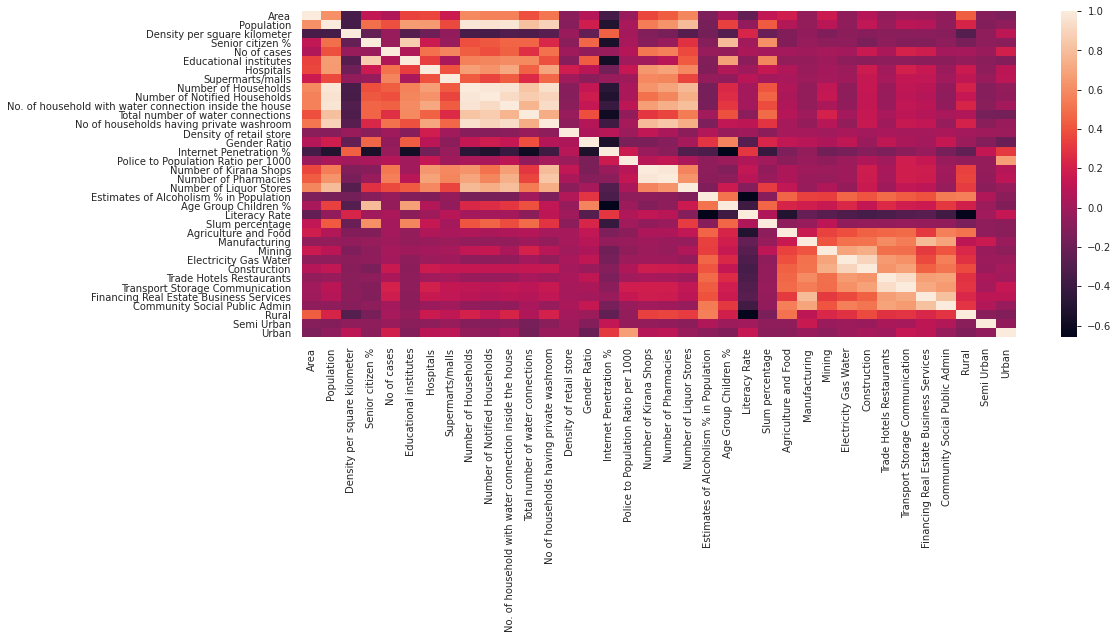

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 6))
corr=sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)


# plt.savefig('correlation.png')

In [ ]:
X = df.drop(['Number of Kirana Shops'], axis=1).values
y = df['Number of Kirana Shops'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
X_train.shape


y_train.shape


# X_test.shape

# y_test.shape

(505,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import  HuberRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.linear_model import  RANSACRegressor
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledXGBOOST', Pipeline([('Scaler', StandardScaler()),('XGBOOST', XGBRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
# pipelines.append(('Scaledhuber', Pipeline([('Scaler', StandardScaler()),('HUBER', HuberRegressor())])))
# pipelines.append(('Scaledcat', Pipeline([('Scaler', StandardScaler()),('CAT', CatBoostRegressor(iterations=500))])))
pipelines.append(('ScaledRandom', Pipeline([('Scaler', StandardScaler()),('Random', RandomForestRegressor())])))
pipelines.append(('ScaledRANSAC', Pipeline([('Scaler', StandardScaler()),('RANSAC', RANSACRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: -2364264.294280 (5473499.086191)
ScaledLASSO: -1156637.832882 (2062879.063938)
ScaledEN: -2014334.849550 (1696157.283408)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: -1976861.103917 (3631208.204565)
ScaledCART: -685133.847505 (1063565.865642)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -420929.422869 (630533.888186)
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledSVR: -12231615.008361 (13383320.688725)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRandom: -882427.397184 (1140594.057853)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRANSAC: -4211987992.238621 (9233276351.810978)


From the output above, it looks like the lasso operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Lasso. The lasso will be tested with a few n_estimators using the GridSearchCV function.

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = RANSACRegressor()
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print ("mean square error",mean_squared_error(y_test, predictions))
print("Root mean square error",np.sqrt(mean_squared_error(y_test, predictions)))
compare = pd.DataFrame({'Test Data' : y_test,'Prediction': predictions,'Difference':y_test-predictions})
print(compare.head(10))
print("Accuracy of the model :" , accuracy_score(y_test,predictions.round(),normalize=False))
print("R2_score :",r2_score(y_test,predictions)*100)
maxerr=max_error(y_test,predictions)
print(f"Maximum Error={maxerr}")
# compare.to_csv("No. of kirana shopes.csv")

mean square error 1012610819.3402447
Root mean square error 31821.546463681563
   Test Data   Prediction  Difference
0     2801.0  2820.033938  -19.033938
1       49.0    56.587968   -7.587968
2       20.0    13.167991    6.832009
3      520.0   880.996320 -360.996320
4       32.0   -43.044104   75.044104
5      510.0   582.119316  -72.119316
6      106.0   106.458450   -0.458450
7     1073.0   480.173171  592.826829
8      105.0   103.659022    1.340978
9       61.0    66.578925   -5.578925
Accuracy of the model : 8
R2_score : -8349.282823779049
Maximum Error=331055.412311067


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = DecisionTreeRegressor(criterion='mse',splitter='best', random_state=21)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print ("mean square error",mean_squared_error(y_test, predictions))
print("Root mean square error",np.sqrt(mean_squared_error(y_test, predictions)))
compare = pd.DataFrame({'Actual Data' : y_test,'Prediction': predictions,'Residual':y_test-predictions})
print(compare.head(10))
print("Accuracy of the model :" , accuracy_score(y_test,predictions.round(),normalize=False))
print("R2_score :",r2_score(y_test,predictions)*100)
maxerr=max_error(y_test,predictions)
print(f"Maximum Error={maxerr}")
compare.to_csv("No. of kirana shopes.csv")

mean square error 1104128.9464456243
Root mean square error 1050.775402474584
   Actual Data  Prediction  Residual
0       2801.0      2734.0      67.0
1         49.0        49.0       0.0
2         20.0        20.0       0.0
3        520.0       818.0    -298.0
4         32.0        40.0      -8.0
5        510.0       531.0     -21.0
6        106.0       107.0      -1.0
7       1073.0      1073.0       0.0
8        105.0       104.0       1.0
9         61.0        46.0      15.0
Accuracy of the model : 50
R2_score : 90.78708466840347
Maximum Error=12139.0


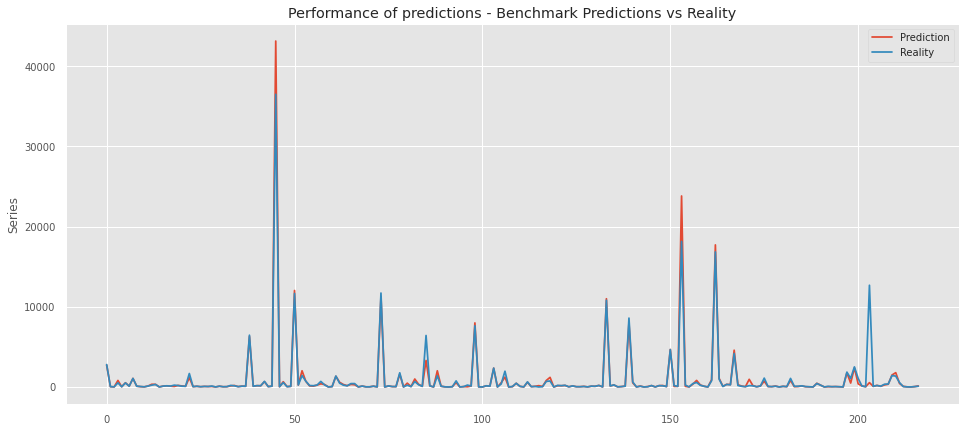

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 7))
line_up, = plt.plot(predictions,label='Prediction')
line_down, = plt.plot(np.array(y_test),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality')
plt.show()
plt.savefig('pre-rea.png')

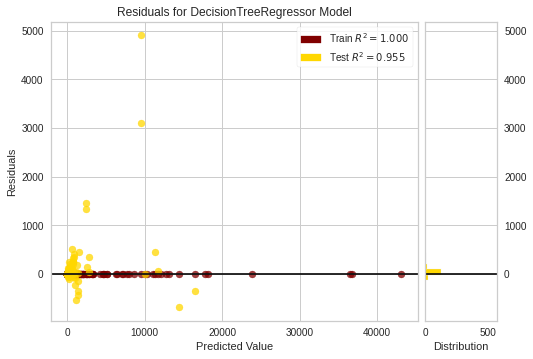

In [ ]:
from yellowbrick.regressor import residuals_plot
visualizer = residuals_plot(
    DecisionTreeRegressor(), X, y, train_color="maroon", test_color="gold"
)

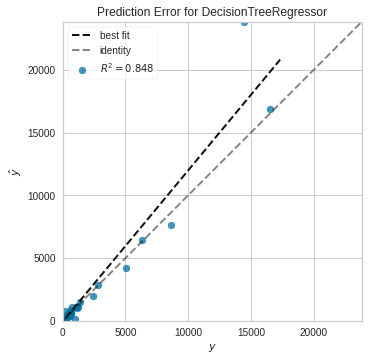

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(DecisionTreeRegressor(), X, y)

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = RandomForestRegressor(n_estimators=200,criterion='mse', random_state=21)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))
print("Root mean square error",np.sqrt(mean_squared_error(y_test, predictions)))
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
print(compare.head(10))
print("Accuracy of the model :" , accuracy_score(y_test,predictions.round(),normalize=False))
print("R2_score :",r2_score(y_test,predictions)*100)

495747.4022827019
Root mean square error 704.0933192998652
    Prediction  Test Data
0  2715.880000     2801.0
1    51.595000       49.0
2    19.870000       20.0
3   652.650000      520.0
4    40.615000       32.0
5   565.491275      510.0
6   118.035000      106.0
7   692.340000     1073.0
8   103.940000      105.0
9    99.230000       61.0
Accuracy of the model : 40
R2_score : 95.86345520802412
